# TensorFlow 內建語音資料集測試

## 載入套件

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import IPython
from IPython.display import Audio
import matplotlib.pyplot as plt
import os
import math

## 顯示TensorFlow內建資料集名稱

In [2]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bridge_data_msr',
 'bucc',
 'c4',
 'c4_ws

## 下載資料集

In [3]:
from datasets import load_dataset
ds = load_dataset("mozilla-foundation/common_voice_17_0", "en", trust_remote_code=True)

## 顯示第一筆資料

In [4]:
type(ds)

datasets.dataset_dict.DatasetDict

In [5]:
ds['train'][0]

{'client_id': 'f15d2e0fd19c04421174108a8c02c3c2ef8e76365cdcc48090b927eca6a1d7f130bd87a104ba14cb4306adab846bb0103ba741261c64d346a94e797b9d6b659e',
 'path': 'C:\\Users\\mikec\\.cache\\huggingface\\datasets\\downloads\\extracted\\ee22577c88c210cd5e7de72c8f02b210dc01e62cc1f5adf5023be9d9ec959470\\en_train_0/common_voice_en_17924809.mp3',
 'audio': {'path': 'C:\\Users\\mikec\\.cache\\huggingface\\datasets\\downloads\\extracted\\ee22577c88c210cd5e7de72c8f02b210dc01e62cc1f5adf5023be9d9ec959470\\en_train_0/common_voice_en_17924809.mp3',
  'array': array([ 0.00000000e+00, -2.50554802e-15, -4.35167835e-16, ...,
          3.45581235e-08,  2.53819294e-08,  2.35923494e-08]),
  'sampling_rate': 48000},
 'sentence': 'Every evening, the dogs in our neighbourhood are howling.',
 'up_votes': 2,
 'down_votes': 0,
 'age': '',
 'gender': '',
 'accent': '',
 'locale': 'en',
 'segment': '',
 'variant': ''}

In [6]:
ds['train'][10]

{'client_id': 'f192662387e6d79daebf9ee40e252a255805fe9cc37898d9083fddeff731266b1575eba28c69d39fab1e5bc8743f49bd73e6d781508d03369b41f8fe55efd22b',
 'path': 'C:\\Users\\mikec\\.cache\\huggingface\\datasets\\downloads\\extracted\\ee22577c88c210cd5e7de72c8f02b210dc01e62cc1f5adf5023be9d9ec959470\\en_train_0/common_voice_en_20009668.mp3',
 'audio': {'path': 'C:\\Users\\mikec\\.cache\\huggingface\\datasets\\downloads\\extracted\\ee22577c88c210cd5e7de72c8f02b210dc01e62cc1f5adf5023be9d9ec959470\\en_train_0/common_voice_en_20009668.mp3',
  'array': array([ 0.00000000e+00, -3.60547299e-14, -2.84596091e-14, ...,
         -2.72471698e-05,  4.84004249e-06,  2.31247868e-05]),
  'sampling_rate': 48000},
 'sentence': 'Examples of the "Ziwiye Treasure" are scattered among public and private collections.',
 'up_votes': 2,
 'down_votes': 0,
 'age': '',
 'gender': '',
 'accent': '',
 'locale': 'en',
 'segment': '',
 'variant': ''}

## 播放

In [10]:
audio_path = ds['train'][0]['path']
Audio(audio_path, autoplay=False)

In [11]:
audio_path = ds['train'][10]['path']
Audio(audio_path, autoplay=False)

## 取得音檔的屬性

In [12]:
import librosa
data, sr = librosa.load(audio_path, sr=None) 
print(f'取樣頻率={sr}, 總樣本數={data.shape}, 檔案秒數={data.shape[0] / sr:.2f}')

取樣頻率=48000, 總樣本數=(334080,), 檔案秒數=6.96


In [13]:
type(data[0])

numpy.float32

## 繪製波形

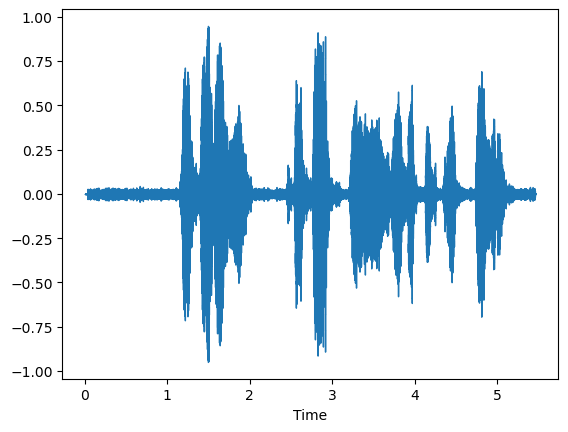

In [52]:
librosa.display.waveshow(data, sr=sr);

## 顯示頻譜圖

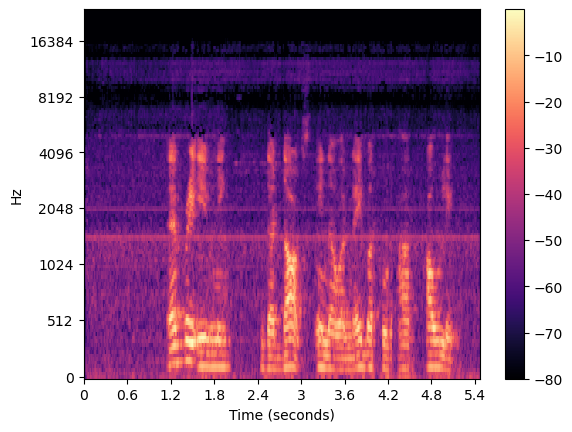

In [53]:
# 載入頻譜圖
spec = librosa.feature.melspectrogram(y=data, sr=sr)

# 顯示頻譜圖
db_spec = librosa.power_to_db(spec, ref=np.max,)
librosa.display.specshow(db_spec,y_axis='mel', x_axis='s', sr=sr)
plt.colorbar()

## 轉換為 MFCC

In [54]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40)
mfcc.shape

(40, 514)